In [2]:
# Load Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.shape

(4000, 14)

In [5]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

The dataset has 4000 observations and 14 features with no missing values.

In [6]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [7]:
X = df.drop(columns=['Churn'])
y = df['Churn']

print(f'X shape {X.shape} and y shape{y.shape}')

X shape (4000, 13) and y shape(4000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)

<a id="univariate_data_visulization" ></a>
[Top](#top)
## Univariate Data Visualization

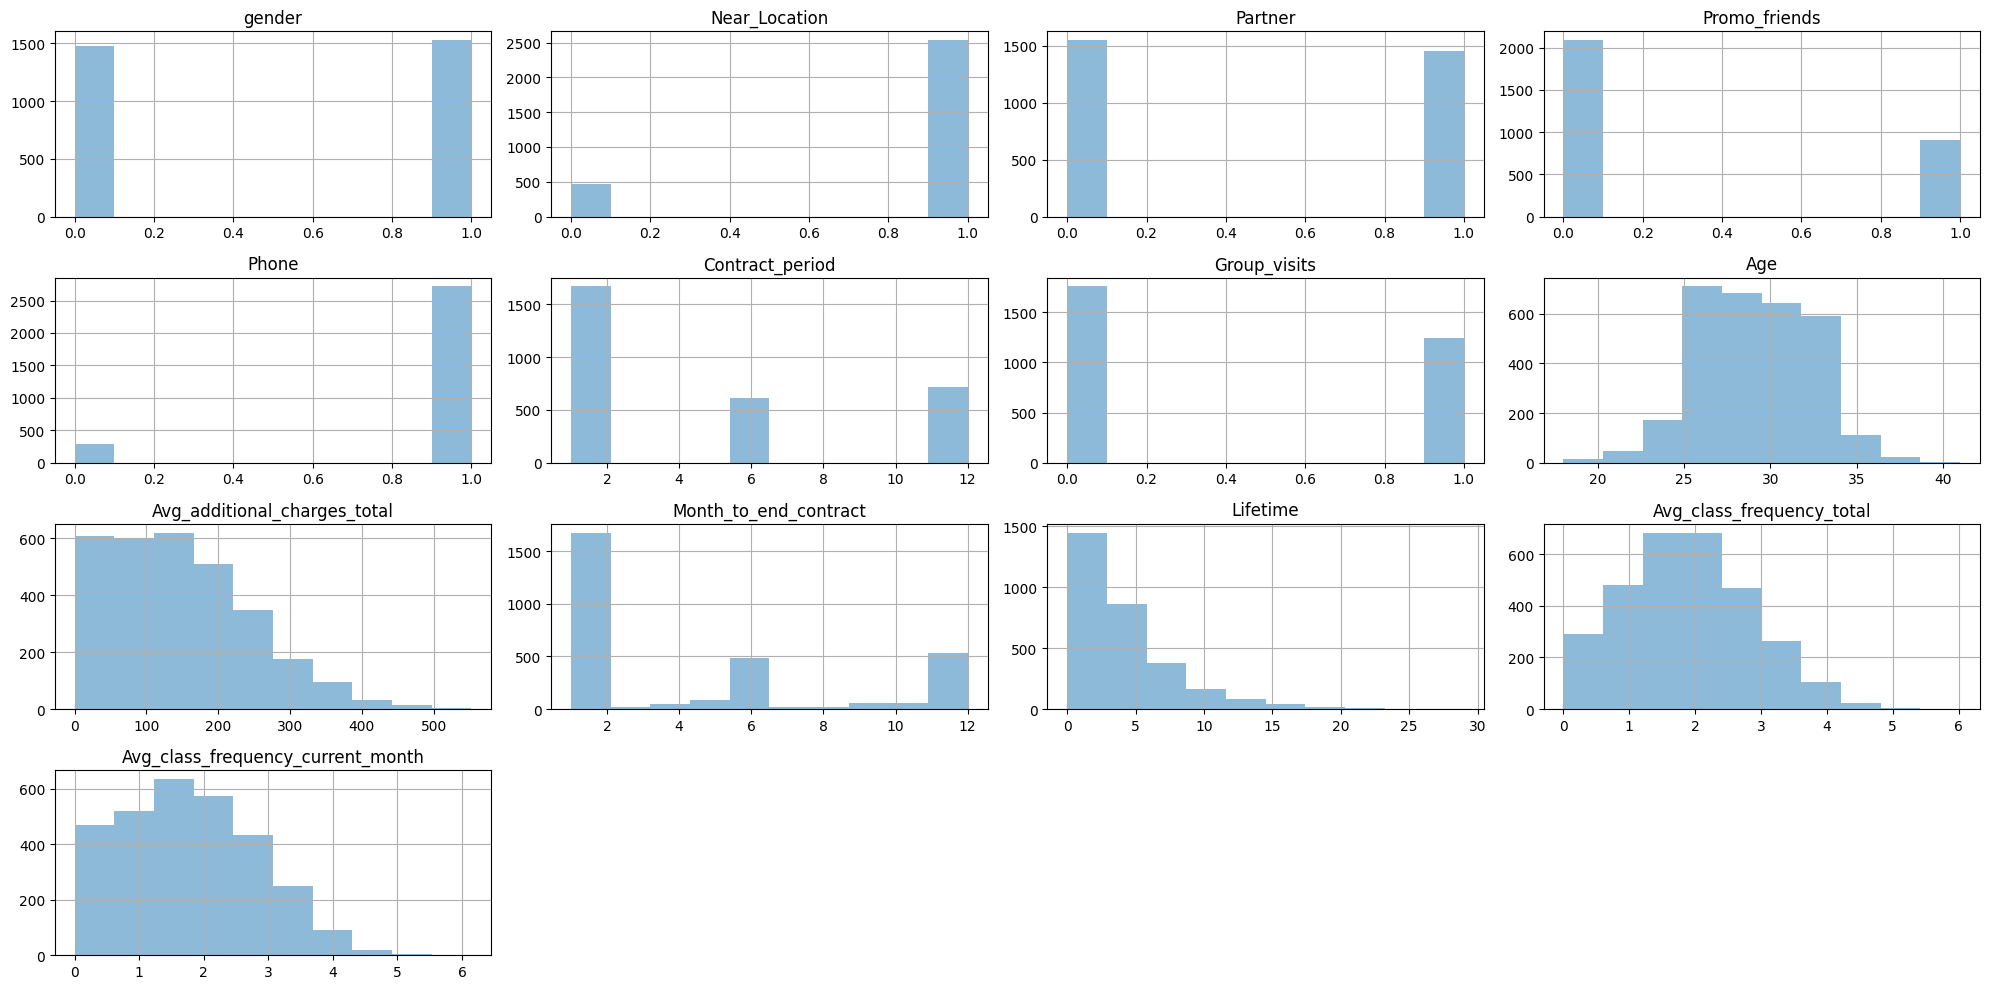

In [9]:
X_train.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

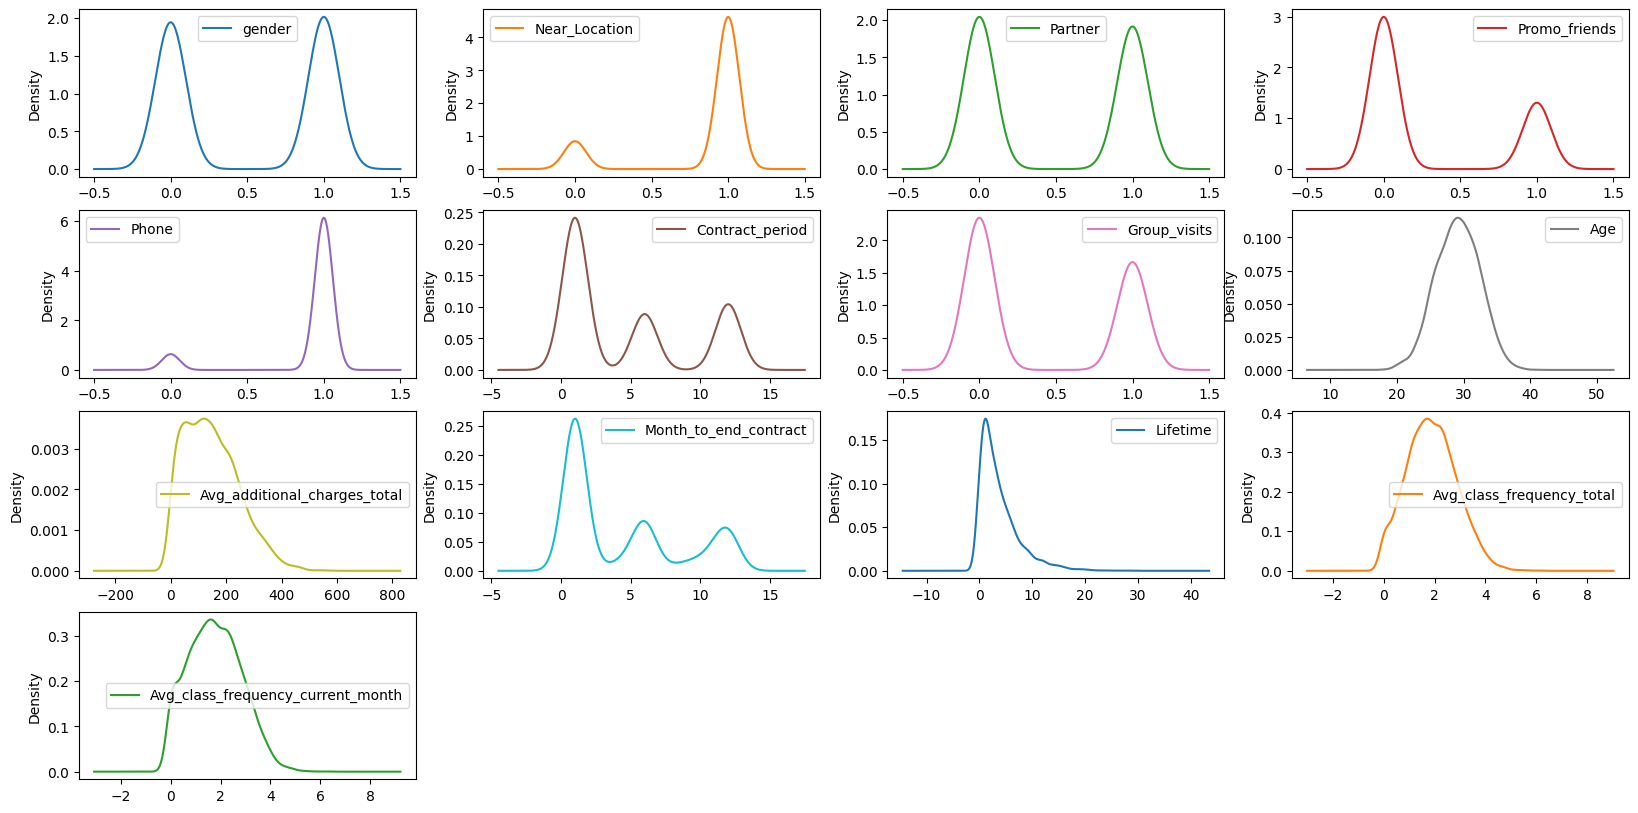

In [10]:
X_train.plot(kind='density', subplots=True,figsize=(20, 10), layout=(4,4), sharex=False)
plt.show()

In [11]:
correlations = X_train.corr()

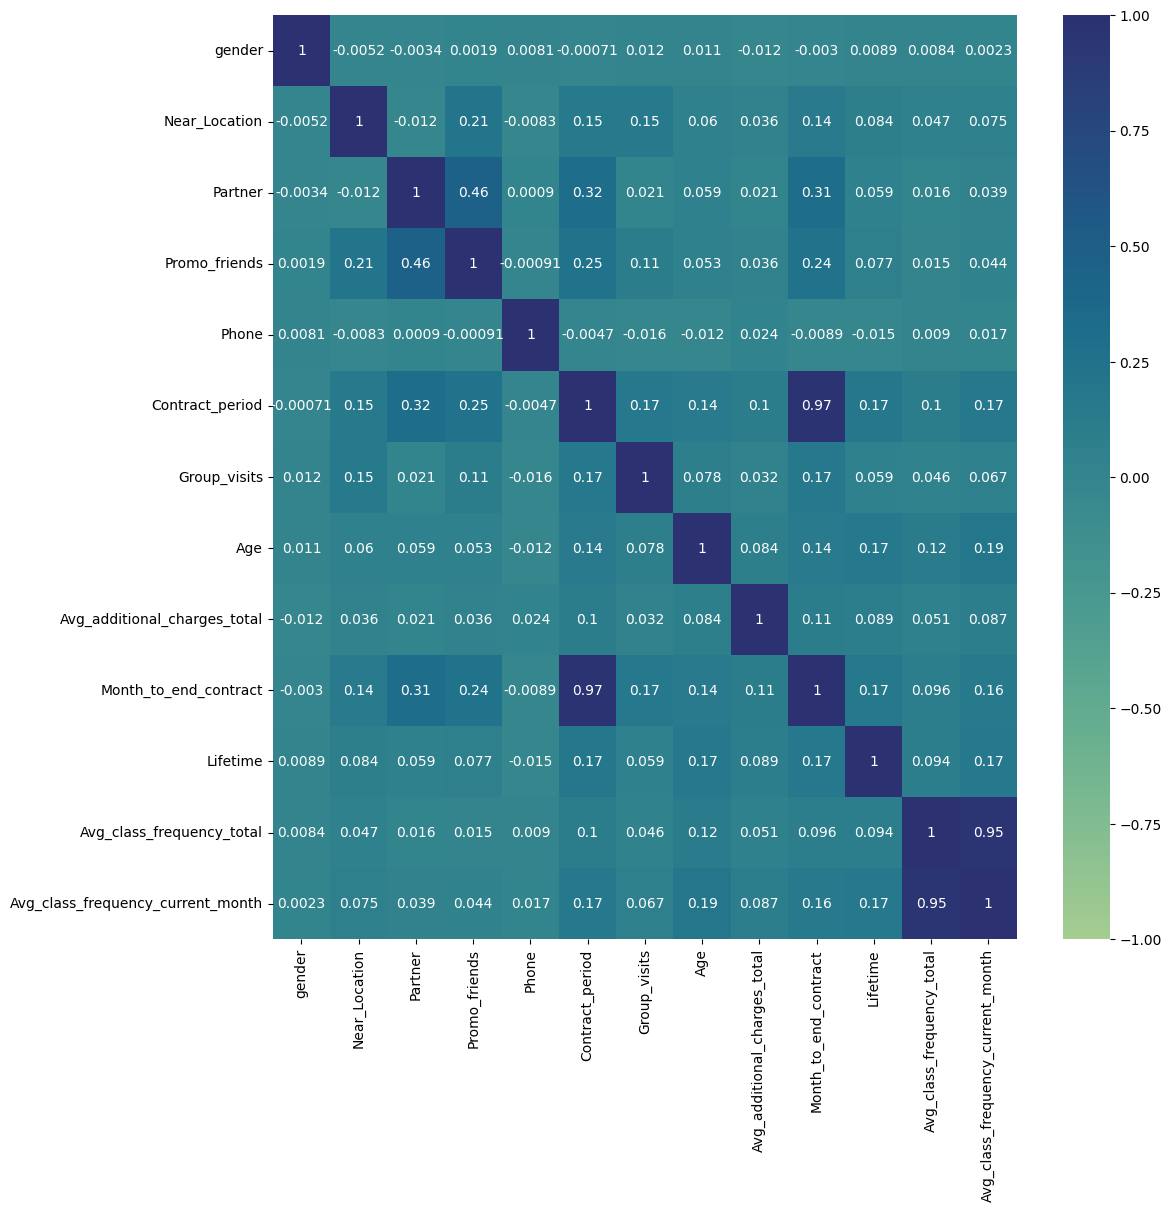

In [12]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True, cmap='crest')

In [13]:
y_train.value_counts(normalize=True)

Churn
0    0.734667
1    0.265333
Name: proportion, dtype: float64

In [14]:
pca = PCA(n_components=5, random_state=1)
logreg = LogisticRegression(solver='liblinear', max_iter=10000)
# scaler_std = StandardScaler()
scaler_min_max = MinMaxScaler()

In [15]:
pipe = Pipeline([('scale', scaler_min_max), ('decomp', pca), ('clf', logreg)])
pipe

Pipeline(steps=[('scale', MinMaxScaler()),
                ('decomp', PCA(n_components=5, random_state=1)),
                ('clf',
                 LogisticRegression(max_iter=10000, solver='liblinear'))])

In [16]:
pipe = Pipeline([('scale',None),('decomp',pca),('clf',logreg)])
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9003333333333334)

In [17]:
pipe = Pipeline([('scale',scaler_min_max),('decomp',pca),('clf',logreg)])
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.7466666666666667)

In [18]:

pipe = Pipeline([('scale',scaler_min_max),('decomp',pca),('clf',logreg)])
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.7466666666666667)

In [19]:
Pipeline([('scale',None),('decomp',pca),('clf',logreg)]).fit(X_train, y_train).score(X_test,y_test)

0.902

<a id="conclusion" ></a>
## Conclusion

The final pipeline is scaling data with MinMaxScaler and then applying Logistic Regression on all the features with accuracy of 90%.